# In Class Notebook, Week 08

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2022/blob/master/week08/inClass_week08.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import numpy as np
import bqplot

In [2]:
# 1. data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

In [3]:
# 2. scales
sc_geo = bqplot.Mercator()

In [4]:
# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

In [6]:
# put it all together as a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0,'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [7]:
# 1. axis/data
shape_data = bqplot.topo_load('map_data/WorldMap.json') # shapes we want to draw

# 2. scales
sc_geo = bqplot.Gnomonic() # a nightmare!

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# 4. figur
fig = bqplot.Figure(marks=[shape_map], 
                    fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [9]:
# axis/data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo})

# in figure
fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [11]:
!ls /Users/jillnaiman/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


In [10]:
# axis/data
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# scales
sc_geo = bqplot.AlbersUSA() # USA-specific projection

# tool tip!
tt = bqplot.Tooltip(fields=['id','name'])
states_map.interactions = {'click':'select', 'hover':'tooltip'}

# marks
states_map = bqplot.Map(map_data = state_data, scales={'projection':sc_geo},
                       tooltip=tt)

# in figure
fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0,'bottom':0,'left':0,'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

## Geopandas

In [12]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [13]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

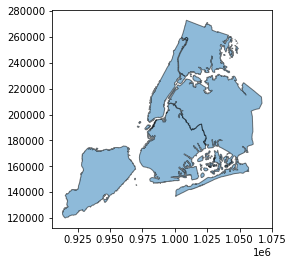

In [15]:
gdf.plot(alpha=0.5, edgecolor='k')

In [16]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [17]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.838498e+08,211060.175261,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Daniel Iniguez,2.009197e+08,144362.359386,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Davion Williams,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Michael Foellmer,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [18]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.298582e+08,115689.972103
std,1.581139,6.161040e+07,61814.979912
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.838498e+08,144362.359386
max,815.000000,2.009197e+08,211060.175261


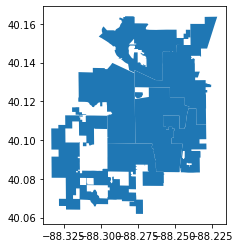

In [19]:
gdf_councils.plot()

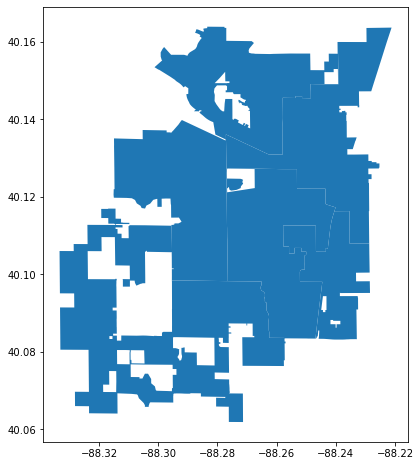

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
gdf_councils.plot(ax=ax)
plt.show()

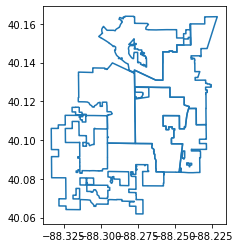

In [21]:
gdf_councils.boundary.plot()

In [22]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.333303,40.061894,-88.257012,40.116995
1,-88.315071,40.098268,-88.239120,40.163956
2,-88.277158,40.107938,-88.221225,40.163721
3,-88.276971,40.083257,-88.240119,40.127432
4,-88.257818,40.083182,-88.228505,40.116346


In [23]:
gdf_councils.centroid

/Users/jillnaiman/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    POINT (-88.29985 40.08720)
1    POINT (-88.28230 40.13391)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [24]:
# what is the coordinate reference system (CRS) i.e. the projection of our data?
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

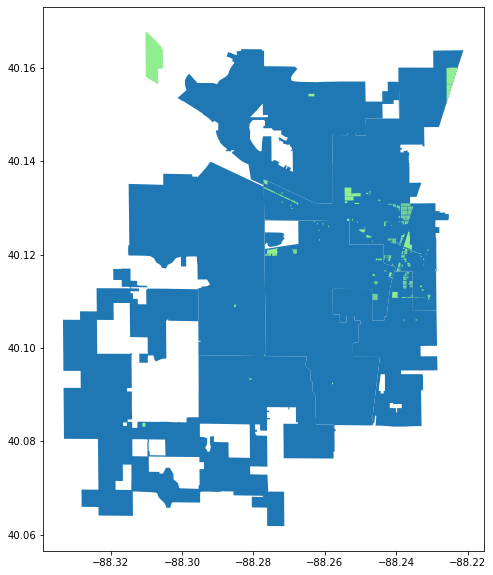

In [26]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_councils.plot(ax=ax) # council map on the bottom
gdf_props.plot(ax=ax,color='lightgreen') # on top
plt.show()

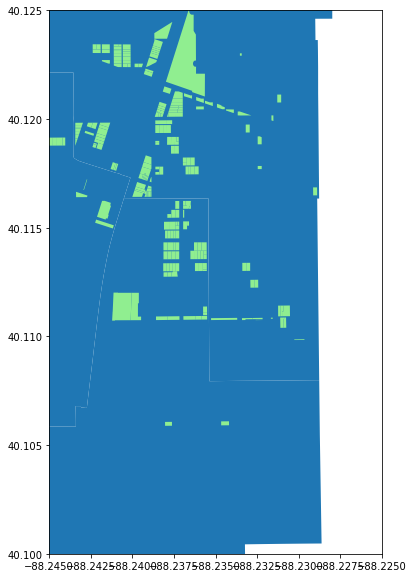

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_councils.plot(ax=ax) # council map on the bottom
gdf_props.plot(ax=ax,color='lightgreen') # on top
ax.set_xlim(-88.245,-88.225) # zooming in on us, longitude
ax.set_ylim(40.10,40.125) # latitude
plt.show()

## Geopandas with Census data (USA)

In [28]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/STATE/tl_2021_us_state.zip')

In [30]:
#gdf_states.head()

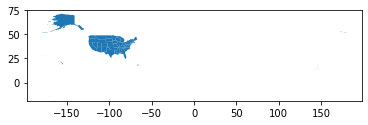

In [31]:
gdf_states.plot()

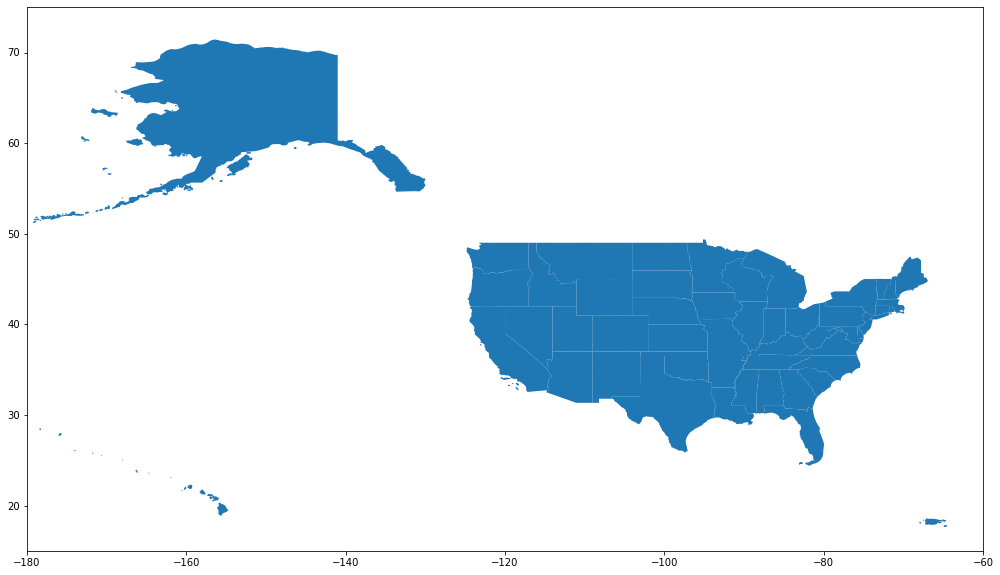

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
gdf_states.plot(ax=ax)
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [33]:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2021/AIANNH/tl_2021_us_aiannh.zip')


In [34]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D2,R,F,G2101,A,2457042,123,+41.4858024,-072.0902766,"MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D8,R,F,G2101,A,371387,0,+36.9850490,-119.6396814,"POLYGON ((-119.64082 36.98500, -119.64058 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89736 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467058,316267874,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


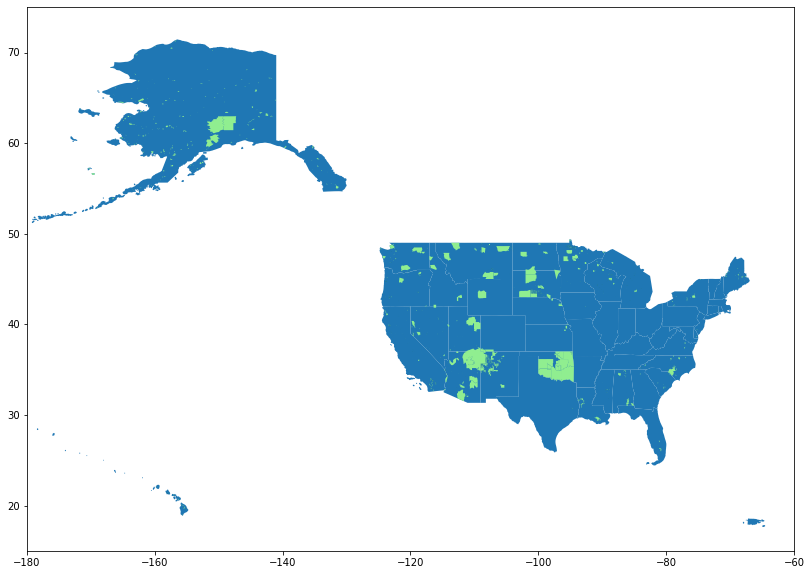

In [35]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='lightgreen')

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

In [36]:
gdf_na['NAMELSAD'].unique()

array(['Mohegan Reservation',
       'Golden Hill Paugussett (state) Reservation',
       'Table Mountain Rancheria', 'Greenville Rancheria',
       'Flathead Reservation', 'Bishop Reservation',
       'Fallon Paiute-Shoshone Reservation', 'Walker River Reservation',
       'Los Coyotes Reservation', 'Manzanita Reservation',
       'Mesa Grande Reservation', 'Pala Reservation',
       'Isabella Reservation', 'Mattaponi (state) Reservation',
       'Roaring Creek Rancheria', 'Pueblo of Pojoaque',
       'Rosebud Indian Reservation', 'Woodfords Community',
       'Spokane Reservation', 'Chitimacha Reservation',
       'Coos, Lower Umpqua, and Siuslaw Reservation',
       'Pascua Pueblo Yaqui Reservation', 'Berry Creek Rancheria',
       'Enterprise Rancheria', 'Shakopee Mdewakanton Sioux Community',
       'Santa Rosa Rancheria', "L'Anse Reservation",
       'Paucatuck Eastern Pequot (state) Reservation',
       'Mississippi Choctaw Reservation', 'Duck Valley Reservation',
       'Southe

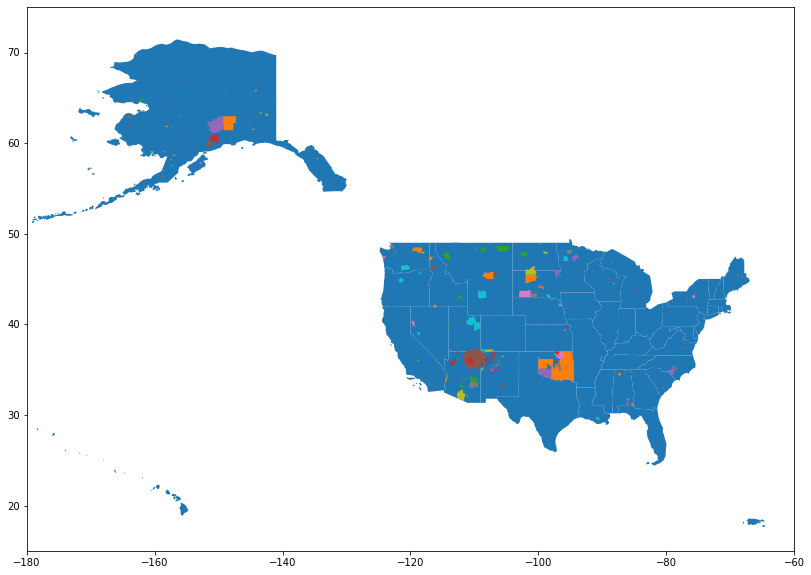

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

gdf_states.plot(ax=ax)
gdf_na.plot(column='NAMELSAD',ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

## Geopandas + contextily

In [38]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


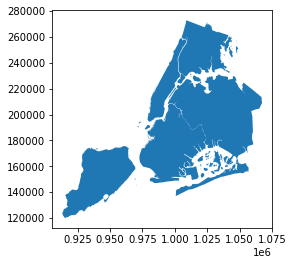

In [39]:
gdf.plot()

In [40]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [41]:
# change into lat/long coordinate reference system
gdf = gdf.to_crs(epsg=4326)

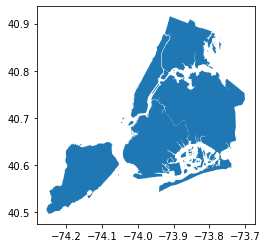

In [42]:
gdf.plot()

In [43]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
import contextily as ctx

In [45]:
gdf = gdf.to_crs(epsg=3857) # changing our dataset into web mercator projection

In [46]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

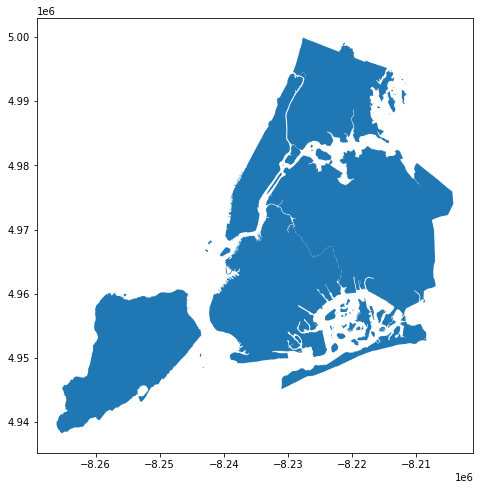

In [47]:
fig, ax = plt.subplots(figsize=(10,8))

gdf.plot(ax=ax)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

gdf.plot(ax=ax)

plt.show()